### --------------------------------------------------------------------------------------------------------------------------------------------------------------

  
  ##                                            PROJECT  CODE - 5ADMACP01
  ##                                            COURSE    CODE-18ECSC301
  ##                                            COURSE NAME-DATA MINING AND ANALYSIS
  


   ##                     UNITED NATIONS MILLENIUM DEVELOPMENT GOALS

   ## To predict the changes in the stated indicators by the UN one and five years in the future, based on their previous data, recorded over the years(1972-2007) 



### ------------------------------------------------------------------------------------------------------------------------------------------------------

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
#import tensorflow as tf
import numpy as np
import pandas as pd

In [9]:
training= pd.read_csv("C:\\Users\\anshu\\Desktop\\dma project\\data\\TrainingSet.csv")
training.tail(5)

,Unnamed: 0,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],...,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],Country Name,Series Code,Series Name
195397,286113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.2,NaN,Zimbabwe,SG.VAW.BURN.ZS,Women who believe a husband is justified in be...
195398,286114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.0,NaN,Zimbabwe,SG.VAW.GOES.ZS,Women who believe a husband is justified in be...
195399,286115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.2,NaN,Zimbabwe,SG.VAW.NEGL.ZS,Women who believe a husband is justified in be...
195400,286116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24.3,NaN,Zimbabwe,SG.VAW.REFU.ZS,Women who believe a husband is justified in be...
195401,286117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.0,57.2,57.5,57.7,57.9,58.1,58.3,Zimbabwe,SH.DYN.AIDS.FE.ZS,Women's share of population ages 15+ living wi...


In [13]:
submission_row= pd.read_csv("C:\\Users\\anshu\\Desktop\\dma project\\data\\SubmissionRows (3).csv");
submission_row.head(5)

,Unnamed: 0,2008 [YR2008],2012 [YR2012]
0,559,NaN,NaN
1,618,NaN,NaN
2,753,NaN,NaN
3,1030,NaN,NaN
4,1896,NaN,NaN


# UNDERSTANDING DATA

### INDICATORS

#### ensure primary education - 2.1
#### reduced child mortality - 4.1
#### enviromental sustainibitlity - 7.8
#### global partnership among nations - 8.16
#### eradicating extreme poverty and hunger - 1.2
#### combat HIV - 6.1
#### combat malaria and other diseases - 6.7
#### women empowerment and gender equality - 3.2
#### maternal healthcare - 5.1










### FILE 1 : Trainingset.csv
#### Row id 
#### Year(1972-2007)
#### Country Name
#### Series Code
#### Series Name

### FILE 2 : SubmissionRow.csv
#### Row id
#### Year(2008)
#### Year(2012)


# PREPROCESSING

## Extracting Chunks (as per indicators)

In [17]:
#extracting data_chunks
education= training.loc[training['Series Code']=='2.1']
environment= training.loc[training['Series Code']=='7.8']
global_partnership= training.loc[training['Series Code']=='8.16']
mortality= training.loc[training['Series Code']=='4.1']
poverty= training.loc[training['Series Code']=='1.2']
HIV= training.loc[training['Series Code']=='6.1']
gender_eq= training.loc[training['Series Code']=='3.2']
malaria= training.loc[training['Series Code']=='6.7']
maternal_health= training.loc[training['Series Code']=='5.1']


print(education.shape)
print(environment.shape)
print(global_partnership.shape)
print(mortality.shape)
print(HIV.shape)
print(gender_eq.shape)
print(malaria.shape)
print(maternal_health.shape)

(184, 40)
(199, 40)
(206, 40)
(192, 40)
(105, 40)
(200, 40)
(54, 40)
(178, 40)


In [18]:
#extracting the numeric rows from the data
education= education.loc[:,education.columns[1]:education.columns[36]]
environment= environment.loc[:,environment.columns[1]:environment.columns[36]]
global_partnership= global_partnership.loc[:,global_partnership.columns[1]:global_partnership.columns[36]]
mortality=mortality.loc[:,mortality.columns[1]:mortality.columns[36]]
poverty=poverty.loc[:,poverty.columns[1]:poverty.columns[36]]
HIV= HIV.loc[:,HIV.columns[1]:HIV.columns[36]]
gender_eq=gender_eq.loc[:,gender_eq.columns[1]:gender_eq.columns[36]]
malaria= malaria.loc[:,malaria.columns[1]:malaria.columns[36]]
maternal_health=maternal_health.loc[:,maternal_health.columns[1]:maternal_health.columns[36]]

## Iterative Imputer

In [70]:
from fancyimpute import IterativeImputer

C:\Users\anshu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [71]:
#transposing the data chunks
chiT=mortality.T
gloT=global_partnership.T
eduT=education.T
envT=environment.T
matT=maternal_health.T
hivT=HIV.T

In [72]:
#applying the iterative imputer on the transposed data chunks.
chiX = IterativeImputer().fit_transform(chiT)
gloX = IterativeImputer().fit_transform(gloT)
eduX= IterativeImputer().fit_transform(eduT)
envX= IterativeImputer().fit_transform(envT)
matX= IterativeImputer().fit_transform(matT)
hivX= IterativeImputer().fit_transform(hivT)


In [74]:
chiX=pd.DataFrame(chiX)
chiX.head(5)

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0.117700,0.022200,0.026300,0.004100,0.1942,0.0128,0.0171,0.023400,0.005600,0.0048,...,0.0080,0.0155,0.050600,0.0220,0.0184,0.026100,0.026700,0.0778,0.127000,0.096600
1,0.114500,0.021200,0.025100,0.004000,0.1911,0.0123,0.0165,0.022300,0.005500,0.0046,...,0.0079,0.0146,0.048900,0.0214,0.0178,0.025200,0.026200,0.0746,0.120400,0.095800
2,0.111500,0.020300,0.024100,0.003800,0.1871,0.0118,0.0159,0.021100,0.005300,0.0044,...,0.0078,0.0134,0.047300,0.0208,0.0172,0.024500,0.025600,0.0717,0.114600,0.096000
3,0.114567,0.021233,0.025167,0.003967,0.1908,0.0123,0.0165,0.022267,0.005467,0.0046,...,0.0079,0.0145,0.048933,0.0214,0.0178,0.025267,0.026167,0.0747,0.120667,0.096133


## Forward And Backward Filling

In [19]:
#forward filling and backward filling
education= education.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)
environment= environment.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)
global_partnership=global_partnership.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)
mortality= mortality.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)
poverty= poverty.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)
HIV=HIV.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)
gender_eq=gender_eq.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)
malaria= malaria.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)
maternal_health=maternal_health.fillna(method="ffill",axis=1).fillna(method="bfill",axis=1)

education.head(5)

,1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],...,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007]
12,0.267007,0.267007,0.267007,0.267007,0.267007,0.267007,0.267007,0.267007,0.267007,0.267007,...,0.279609,0.279609,0.279609,0.279609,0.279609,0.279609,0.279609,0.279609,0.279609,0.279609
895,0.930872,0.930872,0.930872,0.930872,0.930872,0.930872,0.930872,0.930872,0.930872,0.930872,...,0.930872,0.930872,0.936025,0.934958,0.934958,0.912493,0.912493,0.912493,0.912493,0.912493
2100,0.676752,0.676752,0.717112,0.740751,0.758748,0.773166,0.782735,0.782891,0.793252,0.795066,...,0.844342,0.878822,0.890507,0.915648,0.932315,0.939567,0.946588,0.946235,0.942501,0.939003
3643,0.525216,0.525216,0.525216,0.525216,0.525216,0.525216,0.525216,0.525216,0.525216,0.525216,...,0.535690,0.535690,0.535690,0.535690,0.535690,0.535690,0.535690,0.535690,0.535690,0.535690
4712,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,...,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215,0.918215


## Renaming the labels

In [20]:
#Renaming the columns.
education.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]
environment.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]
mortality.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]
global_partnership.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]
poverty.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]
HIV.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]
gender_eq.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]
malaria.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]
maternal_health.columns=[1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007]

# Model Building

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [26]:
#extracting the numeric rows from the data
#education= education.loc[:,education.columns[33]:education.columns[35]]
environment= environment.loc[:,environment.columns[33]:environment.columns[35]]
#global_partnership= global_partnership.loc[:,global_partnership.columns[33]:global_partnership.columns[35]]
#mortality=mortality.loc[:,mortality.columns[33]:mortality.columns[35]]
#poverty=poverty.loc[:,poverty.columns[33]:poverty.columns[35]]
#HIV= HIV.loc[:,HIV.columns[33]:HIV.columns[35]]
#gender_eq=gender_eq.loc[:,gender_eq.columns[33]:gender_eq.columns[35]]
#malaria= malaria.loc[:,malaria.columns[33]:malaria.columns[35]]
#maternal_health=maternal_health.loc[:,maternal_health.columns[33]:maternal_health.columns[35]]

In [27]:
y=[[2005],[2006],[2007]]
#y=[[2006],[2007],[2008]]
#y=[[2007],[2008],[2009]]
#y=[[2008],[2009],[2010]]
#y=[[2009],[2010],[2011]]

In [28]:
z=[]
X_predict=[[2008]]
model=LinearRegression()
j=0
#while j <=183:
#while j<=104:
#while j<=122:
#while j<=177:
#while j<=199:
#while j<=191:
#while j<=53:
#while j<=205:
while j<=198:
    #a=pd.DataFrame([education.iloc[j,:]])
    #a=pd.DataFrame([HIV.iloc[j,:]])
    #a=pd.DataFrame([poverty.iloc[j,:]])
    #a=pd.DataFrame([maternal_health.iloc[j,:]])
    #a=pd.DataFrame([gender_eq.iloc[j,:]])
    #a=pd.DataFrame([mortality.iloc[j,:]])
    #a=pd.DataFrame([malaria.iloc[j,:]])
    #a=pd.DataFrame([global_partnership.iloc[j,:]])
    a=pd.DataFrame([environment.iloc[j,:]])
    model.fit(y,a.T)
    y_predict= model.predict(X_predict)
    j=j+1
    z.append(y_predict)
dff= pd.DataFrame([z])

In [29]:
ab=dff.T

In [30]:
ab=pd.DataFrame(ab)
ab=ab.replace('[[]]','',regex=True).astype(float)
ab.head(5)

,0
0,0.500000
1,0.960667
2,0.836667
3,1.000667
4,1.000000


In [31]:
#education=education.assign(ab=ab.values)
#HIV=HIV.assign(ab=ab.values)
#poverty=poverty.assign(ab=ab.values)
#maternal_health=maternal_health.assign(ab=ab.values)
#gender_eq=gender_eq.assign(ab=ab.values)
#mortality=mortality.assign(ab=ab.values)
#malaria=malaria.assign(ab=ab.values)
#global_partnership=global_partnership.assign(ab=ab.values)
environment=environment.assign(ab=ab.values)

In [32]:
#education.rename(columns={'ab':2012},inplace=True)
#HIV.rename(columns={'ab':2012},inplace=True)
#poverty.rename(columns={'ab':2012},inplace=True)
#maternal_health.rename(columns={'ab':2012},inplace=True)
#gender_eq.rename(columns={'ab':2012},inplace=True)
#mortality.rename(columns={'ab':2012},inplace=True)
#malaria.rename(columns={'ab':2012},inplace=True)
#global_partnership.rename(columns={'ab':2012},inplace=True)
environment.rename(columns={'ab':2008},inplace=True)

In [33]:
environment.head(5)

,2005,2006,2007,2008
336,0.395,0.430,0.465,0.500000
1405,0.962,0.962,0.961,0.960667
2571,0.859,0.852,0.844,0.836667
3323,0.999,1.000,1.000,1.000667
3523,1.000,1.000,1.000,1.000000


In [ ]:
r_index=submission[submission.columns[0]]
#r_index=pd.DataFrame(r_index)

In [ ]:
count=0
for i in r_index:
    for j in environment[environment.columns[7]]:
        if i==j:
            #count=count+1
            #print(i)
            #a=pd.DataFrame(education.loc[education['ind']==i])
            #a=pd.DataFrame(HIV.loc[HIV['ind']==i])
            #a=pd.DataFrame(poverty.loc[poverty['ind']==i])
            #a=pd.DataFrame(maternal_health.loc[maternal_health['ind']==i])
            #a=pd.DataFrame(gender_eq.loc[gender_eq['ind']==i])
            #a=pd.DataFrame(mortality.loc[mortality['ind']==i])
            #a=pd.DataFrame(malaria.loc[malaria['ind']==i])
            #a=pd.DataFrame(global_partnership.loc[global_partnership['ind']==i])
            a=pd.DataFrame(environment.loc[environment['ind']==i])
            a.to_csv("try2.csv",mode='a',encoding='utf-8',index=False,header=False)
    #print(count)

In [ ]:
#edu= training.loc[training['Series Code']=='2.1']
#hiv= training.loc[training['Series Code']=='6.1']
#pov=training.loc[training['Series Code']=='1.2']
#mat=training.loc[training['Series Code']=='5.1']
#gen=training.loc[training['Series Code']=='3.2']
#mor=training.loc[training['Series Code']=='4.1']
#mal=training.loc[training['Series Code']=='6.7']
#glo=training.loc[training['Series Code']=='8.16']
env=training.loc[training['Series Code']=='7.8']

In [ ]:
#aa=edu.iloc[:,0]
#aa=hiv.iloc[:,0]
#aa=pov.iloc[:,0]
#aa=mat.iloc[:,0]
#aa=gen.iloc[:,0]
#aa=mor.iloc[:,0]
#aa=mal.iloc[:,0]
#aa=glo.iloc[:,0]
aa=env.iloc[:,0]

#education=education.assign(ind=aa.values)
#HIV=HIV.assign(ind=aa.values)
#poverty=poverty.assign(ind=aa.values)
#maternal_health=maternal_health.assign(ind=aa.values)
#gender_eq=gender_eq.assign(ind=aa.values)
#mortality=mortality.assign(ind=aa.values)
#malaria=malaria.assign(ind=aa.values)
#global_partnership=global_partnership.assign(ind=aa.values)
environment=environment.assign(ind=aa.values)

In [34]:
sub=pd.read_csv("C:\\Users\\anshu\\Desktop\\dma project\\try\\try2.csv")

In [35]:
#Y=[2005,2006,2007,2008,2009,2010,2011,2012,'ind']
#sub.columns=Y
sub.sort_values(ascending=True,inplace=True,by='ind')

In [37]:
a=sub['2008']
b=sub['2012']
print(a.head(5))
print(b.head(5))

583    0.500000
383    0.016929
190    0.108500
81     0.001000
584    0.960000
Name: 2008, dtype: float64
583    0.640000
383    0.008644
190    0.096500
81     0.001000
584    0.956000
Name: 2012, dtype: float64


# Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
ridgereg= Ridge(alpha=0.01)

In [46]:
#extracting the numeric rows from the data
#education= education.loc[:,education.columns[33]:education.columns[35]]
#environment= environment.loc[:,environment.columns[33]:environment.columns[35]]
global_partnership= global_partnership.loc[:,global_partnership.columns[33]:global_partnership.columns[35]]
#mortality=mortality.loc[:,mortality.columns[33]:mortality.columns[35]]
#poverty=poverty.loc[:,poverty.columns[33]:poverty.columns[35]]
#HIV= HIV.loc[:,HIV.columns[33]:HIV.columns[35]]
#gender_eq=gender_eq.loc[:,gender_eq.columns[33]:gender_eq.columns[35]]
#malaria= malaria.loc[:,malaria.columns[33]:malaria.columns[35]]
#maternal_health=maternal_health.loc[:,maternal_health.columns[33]:maternal_health.columns[35]]

In [49]:
y=[[2005],[2006],[2007]]
#y=[[2006],[2007],[2008]]
#y=[[2007],[2008],[2009]]
#y=[[2008],[2009],[2010]]
#y=[[2009],[2010],[2011]]

In [50]:
z=[]
X_predict=[[2008]]
#model=LinearRegression()
j=0
#while j <=183:
#while j<=104:
#while j<=122:
#while j<=177:
#while j<=199:
#while j<=191:
#while j<=53:
while j<=205:
#while j<=198:
    #a=pd.DataFrame([education.iloc[j,:]])
    #a=pd.DataFrame([HIV.iloc[j,:]])
    #a=pd.DataFrame([poverty.iloc[j,:]])
    #a=pd.DataFrame([maternal_health.iloc[j,:]])
    #a=pd.DataFrame([gender_eq.iloc[j,:]])
    #a=pd.DataFrame([mortality.iloc[j,:]])
    #a=pd.DataFrame([malaria.iloc[j,:]])
    a=pd.DataFrame([global_partnership.iloc[j,:]])
    #a=pd.DataFrame([environment.iloc[j,:]])
    ridgereg.fit(y,a.T)
    #model.fit(y,a.T)
    y_predict= ridgereg.predict(X_predict)
    j=j+1
    z.append(y_predict)
dff= pd.DataFrame([z])

In [51]:
ab=dff.T
ab=pd.DataFrame(ab)
ab=ab.replace('[[]]','',regex=True).astype(float)
ab.head(5)

,0
0,0.024162
1,0.191775
2,0.111463
3,0.000000
4,0.855696


In [52]:
#education=education.assign(ab=ab.values)
#HIV=HIV.assign(ab=ab.values)
#poverty=poverty.assign(ab=ab.values)
#maternal_health=maternal_health.assign(ab=ab.values)
#gender_eq=gender_eq.assign(ab=ab.values)
#mortality=mortality.assign(ab=ab.values)
#malaria=malaria.assign(ab=ab.values)
global_partnership=global_partnership.assign(ab=ab.values)
#environment=environment.assign(ab=ab.values)

In [53]:
#education.rename(columns={'ab':2012},inplace=True)
#HIV.rename(columns={'ab':2012},inplace=True)
#poverty.rename(columns={'ab':2012},inplace=True)
#maternal_health.rename(columns={'ab':2012},inplace=True)
#gender_eq.rename(columns={'ab':2012},inplace=True)
#mortality.rename(columns={'ab':2012},inplace=True)
#malaria.rename(columns={'ab':2012},inplace=True)
global_partnership.rename(columns={'ab':2008},inplace=True)
#environment.rename(columns={'ab':2012},inplace=True)

In [54]:
#edu= training.loc[training['Series Code']=='2.1']
#hiv= training.loc[training['Series Code']=='6.1']
#pov=training.loc[training['Series Code']=='1.2']
#mat=training.loc[training['Series Code']=='5.1']
#gen=training.loc[training['Series Code']=='3.2']
#mor=training.loc[training['Series Code']=='4.1']
#mal=training.loc[training['Series Code']=='6.7']
glo=training.loc[training['Series Code']=='8.16']
#env=training.loc[training['Series Code']=='7.8']

In [ ]:
#Obtaining and adding the row index value to the newly appended data chunk


#aa=edu.iloc[:,0]
#aa=hiv.iloc[:,0]
#aa=pov.iloc[:,0]
#aa=mat.iloc[:,0]
#aa=gen.iloc[:,0]
#aa=mor.iloc[:,0]
#aa=mal.iloc[:,0]
aa=glo.iloc[:,0]
#aa=env.iloc[:,0]

#education=education.assign(ind=aa.values)
#HIV=HIV.assign(ind=aa.values)
#poverty=poverty.assign(ind=aa.values)
#maternal_health=maternal_health.assign(ind=aa.values)
#gender_eq=gender_eq.assign(ind=aa.values)
#mortality=mortality.assign(ind=aa.values)
#malaria=malaria.assign(ind=aa.values)
global_partnership=global_partnership.assign(ind=aa.values)
#environment=environment.assign(ind=aa.values)

In [ ]:
r_index=submission[submission.columns[0]]
#r_index=pd.DataFrame(r_index)

In [ ]:
count=0
for i in r_index:
    for j in global_partnership[global_partnership.columns[8]]:
        if i==j:
            #count=count+1
            #print(i)
            #a=pd.DataFrame(education.loc[education['ind']==i])
            #a=pd.DataFrame(HIV.loc[HIV['ind']==i])
            #a=pd.DataFrame(poverty.loc[poverty['ind']==i])
            #a=pd.DataFrame(maternal_health.loc[maternal_health['ind']==i])
            #a=pd.DataFrame(gender_eq.loc[gender_eq['ind']==i])
            #a=pd.DataFrame(mortality.loc[mortality['ind']==i])
            #a=pd.DataFrame(malaria.loc[malaria['ind']==i])
            a=pd.DataFrame(global_partnership.loc[global_partnership['ind']==i])
            #a=pd.DataFrame(environment.loc[environment['ind']==i])
            a.to_csv("try3.csv",mode='a',encoding='utf-8',index=False,header=False)
    #print(count)

In [55]:
sub=pd.read_csv("C:\\Users\\anshu\\Desktop\\dma project\\try\\try3.csv")

In [56]:
sub.sort_values(ascending=True,inplace=True,by='ind')

In [57]:
a=sub['2008']
b=sub['2012']
print(a.head(5))
print(b.head(5))

81     0.496667
537    0.023874
344    0.108662
235    0.001000
82     0.960714
Name: 2008, dtype: float64
81     0.615792
537    0.035376
344    0.098111
235    0.001000
82     0.959012
Name: 2012, dtype: float64


# lasso regression( fills the same value for all the rows)

In [58]:
from sklearn.linear_model import Lasso

In [59]:
clf= Lasso(alpha=0.1)

In [60]:
#extracting the numeric rows from the data
#education= education.loc[:,education.columns[33]:education.columns[35]]
#environment= environment.loc[:,environment.columns[33]:environment.columns[35]]
#global_partnership= global_partnership.loc[:,global_partnership.columns[33]:global_partnership.columns[35]]
mortality=mortality.loc[:,mortality.columns[33]:mortality.columns[35]]
#poverty=poverty.loc[:,poverty.columns[33]:poverty.columns[35]]
#HIV= HIV.loc[:,HIV.columns[33]:HIV.columns[35]]
#gender_eq=gender_eq.loc[:,gender_eq.columns[33]:gender_eq.columns[35]]
#malaria= malaria.loc[:,malaria.columns[33]:malaria.columns[35]]
#maternal_health=maternal_health.loc[:,maternal_health.columns[33]:maternal_health.columns[35]]

In [61]:
y=[[2005],[2006],[2007]]
#y=[[2006],[2007],[2008]]
#y=[[2007],[2008],[2009]]
#y=[[2008],[2009],[2010]]
#y=[[2009],[2010],[2011]]

In [62]:
z=[]
X_predict=[[2008]]
#model=LinearRegression()
j=0
#while j <=183:
#while j<=104:
#while j<=122:
#while j<=177:
#while j<=199:
while j<=191:
#while j<=53:
#while j<=205:
#while j<=198:
    #a=pd.DataFrame([education.iloc[j,:]])
    #a=pd.DataFrame([HIV.iloc[j,:]])
    #a=pd.DataFrame([poverty.iloc[j,:]])
    #a=pd.DataFrame([maternal_health.iloc[j,:]])
    #a=pd.DataFrame([gender_eq.iloc[j,:]])
    a=pd.DataFrame([mortality.iloc[j,:]])
    #a=pd.DataFrame([malaria.iloc[j,:]])
    #a=pd.DataFrame([global_partnership.iloc[j,:]])
    #a=pd.DataFrame([environment.iloc[j,:]])
    clf.fit(y,a.T)
    y_predict= clf.predict(X_predict)
    j=j+1
    z.append(y_predict)
dff= pd.DataFrame([z])

In [63]:
ab=dff.T
ab=pd.DataFrame(ab)
ab=ab.replace('[[]]','',regex=True).astype(float)
ab.head(5)

,0
0,0.114567
1,0.021233
2,0.025167
3,0.003967
4,0.190800


In [64]:
#education=education.assign(ab=ab.values)
#HIV=HIV.assign(ab=ab.values)
#poverty=poverty.assign(ab=ab.values)
#maternal_health=maternal_health.assign(ab=ab.values)
#gender_eq=gender_eq.assign(ab=ab.values)
mortality=mortality.assign(ab=ab.values)
#malaria=malaria.assign(ab=ab.values)
#global_partnership=global_partnership.assign(ab=ab.values)
#environment=environment.assign(ab=ab.values)

In [65]:
#education.rename(columns={'ab':2012},inplace=True)
#HIV.rename(columns={'ab':2012},inplace=True)
#poverty.rename(columns={'ab':2012},inplace=True)
#maternal_health.rename(columns={'ab':2012},inplace=True)
#gender_eq.rename(columns={'ab':2012},inplace=True)
mortality.rename(columns={'ab':2008},inplace=True)
#malaria.rename(columns={'ab':2012},inplace=True)
#global_partnership.rename(columns={'ab':2012},inplace=True)
#environment.rename(columns={'ab':2012},inplace=True)

In [66]:
#edu= training.loc[training['Series Code']=='2.1']
#hiv= training.loc[training['Series Code']=='6.1']
#pov=training.loc[training['Series Code']=='1.2']
#mat=training.loc[training['Series Code']=='5.1']
#gen=training.loc[training['Series Code']=='3.2']
mor=training.loc[training['Series Code']=='4.1']
#mal=training.loc[training['Series Code']=='6.7']
#glo=training.loc[training['Series Code']=='8.16']
#env=training.loc[training['Series Code']=='7.8']

In [ ]:
#aa=edu.iloc[:,0]
#aa=hiv.iloc[:,0]
#aa=pov.iloc[:,0]
#aa=mat.iloc[:,0]
#aa=gen.iloc[:,0]
#aa=mor.iloc[:,0]
#aa=mal.iloc[:,0]
#aa=glo.iloc[:,0]
aa=env.iloc[:,0]

#education=education.assign(ind=aa.values)
#HIV=HIV.assign(ind=aa.values)
#poverty=poverty.assign(ind=aa.values)
#maternal_health=maternal_health.assign(ind=aa.values)
#gender_eq=gender_eq.assign(ind=aa.values)
#mortality=mortality.assign(ind=aa.values)
#malaria=malaria.assign(ind=aa.values)
#global_partnership=global_partnership.assign(ind=aa.values)
environment=environment.assign(ind=aa.values)

In [ ]:
r_index=submission[submission.columns[0]]
#r_index=pd.DataFrame(r_index)

In [ ]:
count=0
for i in r_index:
    for j in environment[environment.columns[8]]:
        if i==j:
            #count=count+1
            #print(i)
            #a=pd.DataFrame(education.loc[education['ind']==i])
            #a=pd.DataFrame(HIV.loc[HIV['ind']==i])
            #a=pd.DataFrame(poverty.loc[poverty['ind']==i])
            #a=pd.DataFrame(maternal_health.loc[maternal_health['ind']==i])
            #a=pd.DataFrame(gender_eq.loc[gender_eq['ind']==i])
            #a=pd.DataFrame(mortality.loc[mortality['ind']==i])
            #a=pd.DataFrame(malaria.loc[malaria['ind']==i])
            #a=pd.DataFrame(global_partnership.loc[global_partnership['ind']==i])
            a=pd.DataFrame(environment.loc[environment['ind']==i])
            a.to_csv("try4.csv",mode='a',encoding='utf-8',index=False,header=False)
    #print(count)

In [67]:
sub=pd.read_csv("C:\\Users\\anshu\\Desktop\\dma project\\try\\try4.csv")

In [68]:
sub.sort_values(ascending=True,inplace=True,by='ind')

In [69]:
a=sub['2008']
b=sub['2012']
print(a.head(5))
print(b.head(5))

583    0.430000
383    0.017438
190    0.114567
81     0.001000
584    0.961667
Name: 2008, dtype: float64
583    0.430000
383    0.017438
190    0.114567
81     0.001000
584    0.961667
Name: 2012, dtype: float64


#  Model Evaluation

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
from sklearn.metrics import mean_squared_error

# Bias-Variance Curves

## Linear Regression


In [75]:
z=HIV[HIV.columns].T

In [81]:
z=z[z.columns[1]]
z=z.values
z

array([0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
       0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006,
       0.006, 0.007, 0.009, 0.01 , 0.011, 0.013, 0.014, 0.015, 0.016,
       0.017, 0.017, 0.018, 0.019, 0.019, 0.02 , 0.02 , 0.02 , 0.021])

In [79]:
c=training_data.columns
c=c[1:37]

In [80]:
c0

Index(['1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]'],
      dtype='object')

In [83]:
import matplotlib.pyplot as plt


In [85]:
X = c
y = z

In [86]:
X.shape

(36,)

In [87]:
list=[]
for i in X:
    z=i.split()
    list.append(z[0])
list1=[]
for i in list:
    list1.append(int(i))
X = np.asarray(list1)


In [88]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)
X.shape

(36, 1)

In [89]:
X_train=X[0:33]
y_train=y[0:33]

In [90]:
X_test=X[33:37]
y_test=y[33:37]

In [93]:
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold

C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\anshu\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = X,
                                                   y = y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [96]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 2    -0.000000e+00
9    -0.000000e+00
15    4.278541e-07
21    2.479440e-06
28    4.742185e-06
dtype: float64

 --------------------

Mean validation scores

 2     0.000054
9     0.000054
15    0.000055
21    0.000053
28    0.000020
dtype: float64


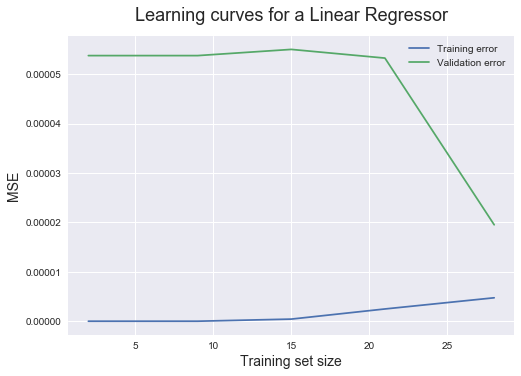

In [97]:
plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Linear Regressor', fontsize = 18, y = 1.03)
plt.legend()

## Ridge

In [98]:
from sklearn.linear_model import Ridge

In [99]:
#cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = Ridge(alpha=0.05,normalize=True), X = X,
                                                   y = y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [100]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 2    -0.000000e+00
9    -0.000000e+00
15    4.287423e-07
21    2.495533e-06
28    4.794143e-06
dtype: float64

 --------------------

Mean validation scores

 2     0.000054
9     0.000054
15    0.000055
21    0.000053
28    0.000019
dtype: float64


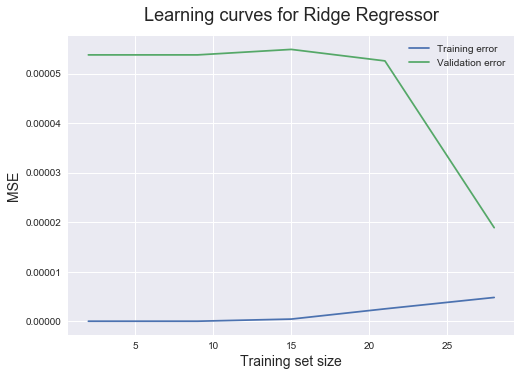

In [101]:
plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Ridge Regressor', fontsize = 18, y = 1.03)
plt.legend()

## LARS

In [104]:
from sklearn.linear_model import Lars

In [105]:
#cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = Lars(normalize=True), X = X,
                                                   y = y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [106]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 2    -0.000000e+00
9    -0.000000e+00
15    4.278541e-07
21    2.479440e-06
28    4.742185e-06
dtype: float64

 --------------------

Mean validation scores

 2     0.000054
9     0.000054
15    0.000055
21    0.000053
28    0.000020
dtype: float64


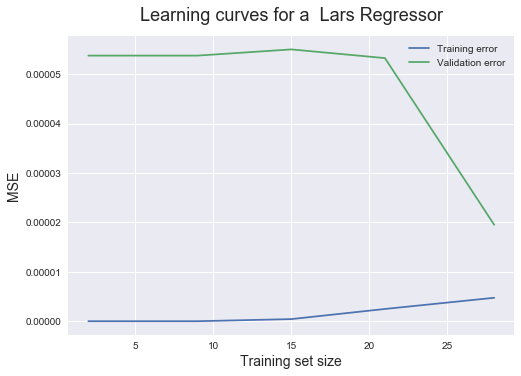

In [107]:
plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a  Lars Regressor', fontsize = 18, y = 1.03)
plt.legend()

In [108]:
from sklearn.linear_model import Lasso

In [109]:
#cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator =  Lasso(alpha=0.1), X = X,
                                                   y = y, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [110]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 2    -0.000000e+00
9    -0.000000e+00
15    8.195556e-07
21    9.576417e-06
28    2.765561e-05
dtype: float64

 --------------------

Mean validation scores

 2     0.000054
9     0.000054
15    0.000054
21    0.000056
28    0.000050
dtype: float64


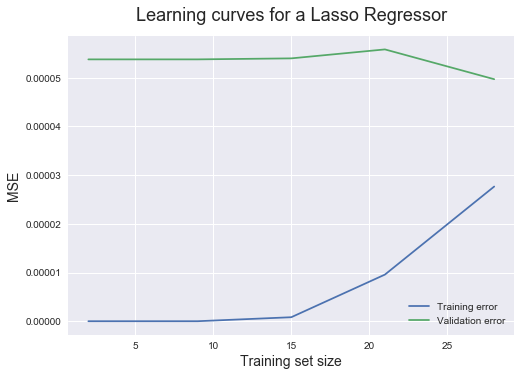

In [111]:
plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Lasso Regressor', fontsize = 18, y = 1.03)
plt.legend()

# RMSE

### LINEAR REGRESSION - 0.13
### RIDGE REGRESSION -0.0513
### LARS REGRESSION  -0.0533



# Conclusion

### Predictions for the indicators specified for the year 2008 and 2012 were made and a submission file was generated.
### Out of the two preprocessing techniques, F and B filling produced the best imputation.
### Out of the four predictive models, Ridge regression produced the best results.(0.0513)
### The evaluation metric was the bias-variance curve and rmse values.
### Based on the bias-variance curve, Lasso regression was discarded.
### Based on the rmse value Ridge regression was selected as the best predictive model.
